# Setting pandas

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

# import datetime
import datetime
from datetime import datetime, date

# set a few settings for pandas, for correct
# output format
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)

# import matplotlib for graph draw
import matplotlib.pyplot as plt
%matplotlib inline

# Download and organize stock price data provided by the Yahoo Finance web service

In [2]:
# import package yfinance
import yfinance as yf

# we read data from Yahoo Finance for a specific stock 
# companies for a specific period, ticker is a trading code
# shares, start and end - start and end dates
def get_stock_data(ticker, start, end):
    # read the data
    data = yf.download(ticker, start, end)

    # rename this column
    data.insert(0, "Ticker", ticker)
    return data

In [3]:
# we request data for the MSFT trading code
# over a three year period
start = datetime(2021, 1, 1)
end = datetime(2023, 12, 31)
get_stock_data("MSFT", start, end)[:5]

[*********************100%***********************]  1 of 1 completed


           Ticker        Open        High         Low  \
Date                                                    
2021-01-04   MSFT  222.529999  223.000000  214.809998   
2021-01-05   MSFT  217.259995  218.520004  215.699997   
2021-01-06   MSFT  212.169998  216.490005  211.940002   
2021-01-07   MSFT  214.039993  219.339996  213.710007   
2021-01-08   MSFT  218.679993  220.580002  217.029999   

                 Close   Adj Close    Volume  
Date                                          
2021-01-04  217.690002  210.844299  37130100  
2021-01-05  217.899994  211.047638  23823000  
2021-01-06  212.250000  205.575348  35930700  
2021-01-07  218.289993  211.425446  27694500  
2021-01-08  219.619995  212.713593  22956200  

In [4]:
# loading data for several trading codes
# shares: set a list of trading codes
# start and end are the start and end dates
def get_data_for_multiple_stocks(tickers, start, end):
    # we are returning the dictionary
    stocks = dict()
    # iterate through all stock trading codes
    for ticker in tickers:
        # download data for a specific trading code
        s = get_stock_data(ticker, start, end)
        # add them to the dictionary
        stocks[ticker] = s
    # return the dictionary
    return stocks

In [5]:
# download data on all promotions that interest us
raw = get_data_for_multiple_stocks(
    ["MSFT", "AAPL", "GE", "IBM", "AA", "DAL", "UAL", "PEP", "KO"],
    start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
# let's take a look at the data on
# trading code MSFT
raw['MSFT'][:5]

           Ticker        Open        High         Low  \
Date                                                    
2021-01-04   MSFT  222.529999  223.000000  214.809998   
2021-01-05   MSFT  217.259995  218.520004  215.699997   
2021-01-06   MSFT  212.169998  216.490005  211.940002   
2021-01-07   MSFT  214.039993  219.339996  213.710007   
2021-01-08   MSFT  218.679993  220.580002  217.029999   

                 Close   Adj Close    Volume  
Date                                          
2021-01-04  217.690002  210.844299  37130100  
2021-01-05  217.899994  211.047638  23823000  
2021-01-06  212.250000  205.575348  35930700  
2021-01-07  218.289993  211.425446  27694500  
2021-01-08  219.619995  212.713593  22956200  

In [7]:
# rotate the data, turning the Ticker column values
# in column names corresponding to stock trading codes
def pivot_tickers_to_columns(raw, column):
    items = []
    # iterate over all dictionary keys
    for key in raw:
        # get data by key
        data = raw[key]
        # retrieve a given column
        subset = data[["Ticker", column]]
        # add to elements
        items.append(subset)
    
    # concatenate all elements
    combined = pd.concat(items)
    # reset the index
    ri = combined.reset_index()
    # return data by performing a rotation
    return ri.pivot("Date", "Ticker", column)

In [8]:
# make a turn
close_px = pivot_tickers_to_columns(raw, "Close")
# look at the result
close_px[:5]

Ticker             AA        AAPL        DAL  ...  \
Date                                          ...   
2021-01-04  23.250000  129.410004  38.730000  ...   
2021-01-05  23.670000  131.009995  39.549999  ...   
2021-01-06  25.209999  126.599998  40.380001  ...   
2021-01-07  25.230000  130.919998  40.230000  ...   
2021-01-08  24.990000  132.050003  40.020000  ...   

Ticker            MSFT         PEP        UAL  
Date                                           
2021-01-04  217.690002  144.270004  41.630001  
2021-01-05  217.899994  144.699997  43.400002  
2021-01-06  212.250000  142.929993  43.540001  
2021-01-07  218.289993  142.470001  43.619999  
2021-01-08  219.619995  144.179993  43.290001  

[5 rows x 9 columns]

# Visualization of stock price time series

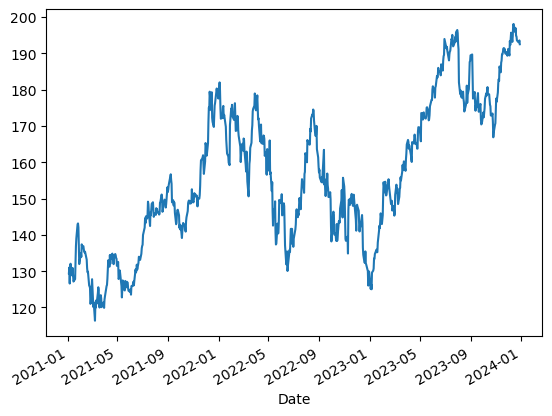

In [9]:
# visualize closing prices for AAPL
close_px['AAPL'].plot();

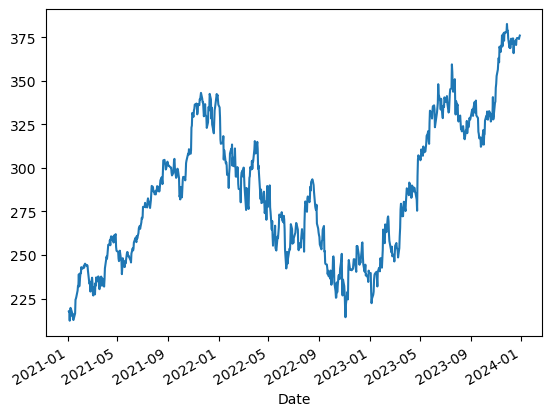

In [10]:
# visualize closing prices for MSFT
close_px['MSFT'].plot();

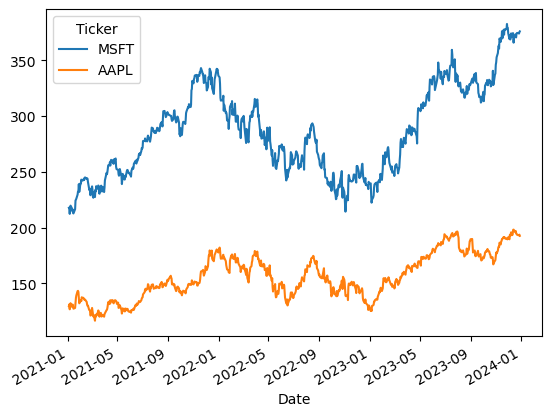

In [11]:
# visualize closing prices for MSFT and AAPL 
# on the same chart
close_px[['MSFT', 'AAPL']].plot();

# Visualization of time series of trading volumes

In [12]:
# make a rotation, turning the data 
# about trading volumes in columns
volumes = pivot_tickers_to_columns(raw, "Volume")
volumes.tail()

Ticker           AA      AAPL      DAL  ...      MSFT  \
Date                                    ...             
2023-12-22  9064600  37122800  6834400  ...  17091100   
2023-12-26  4505900  28919300  4722900  ...  12673100   
2023-12-27  5798100  48087700  4486400  ...  14905400   
2023-12-28  3909900  34049900  4558100  ...  14327000   
2023-12-29  3294300  42628800  8620600  ...  18723000   

Ticker          PEP      UAL  
Date                          
2023-12-22  3030100  4957600  
2023-12-26  2779200  5260400  
2023-12-27  3502500  4863100  
2023-12-28  2911100  3813700  
2023-12-29  3291500  5588700  

[5 rows x 9 columns]

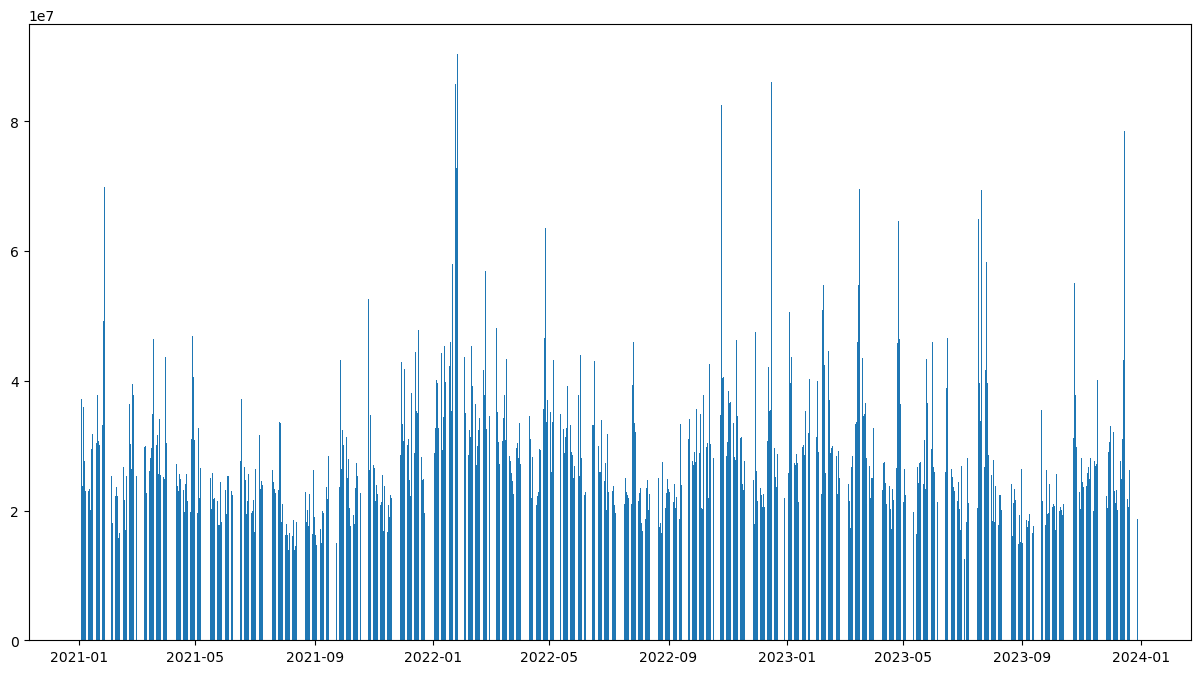

In [13]:
# visualize trading volume data for MSFT
msft_volume = volumes[["MSFT"]]
plt.bar(msft_volume.index, msft_volume["MSFT"])
plt.gcf().set_size_inches(15,8)

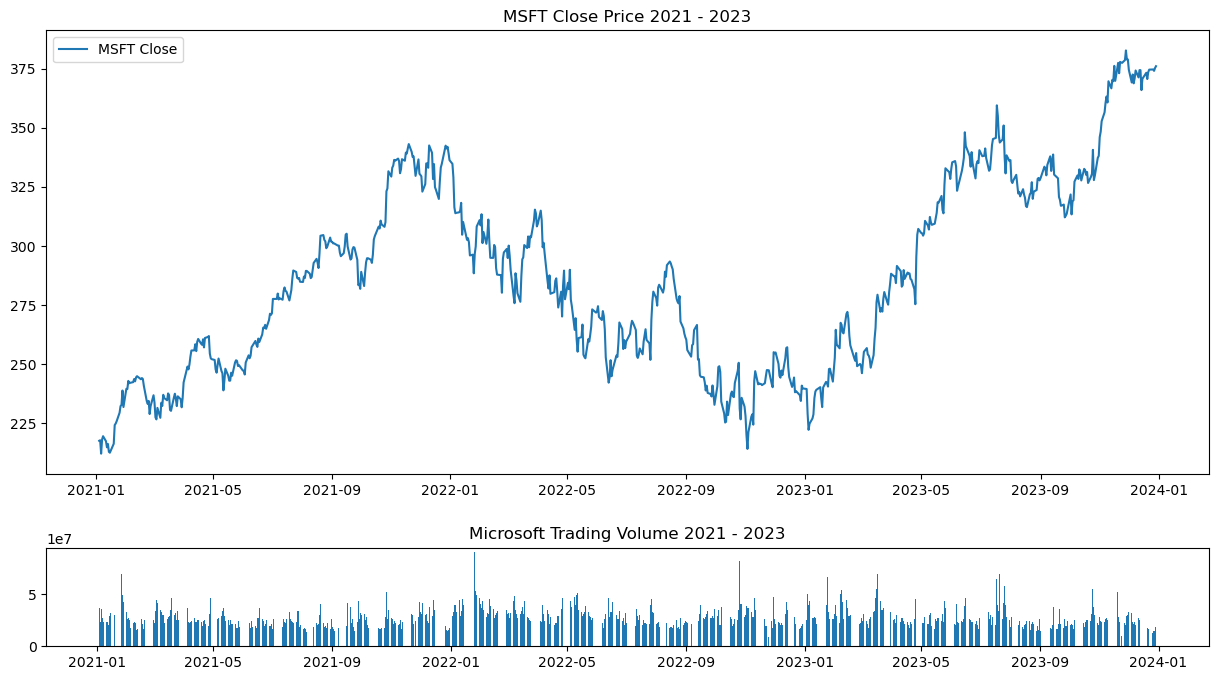

In [14]:
# At the top we place the closing price chart
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(close_px['MSFT'].index, close_px['MSFT'], 
         label='MSFT Close')
plt.title('MSFT Close Price 2021 - 2023')
plt.legend(loc=2)

# At the bottom we place a chart of trading volume
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(msft_volume.index, msft_volume['MSFT'])
plt.title('Microsoft Trading Volume 2021 - 2023')
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(15,8)

# Calculating the simple daily percentage change in closing price

In [15]:
# calculate daily percentage change
daily_pc = close_px / close_px.shift(1) - 1
daily_pc[:5]

Ticker            AA      AAPL       DAL  ...      MSFT  \
Date                                      ...             
2021-01-04       NaN       NaN       NaN  ...       NaN   
2021-01-05  0.018065  0.012364  0.021172  ...  0.000965   
2021-01-06  0.065061 -0.033662  0.020986  ... -0.025929   
2021-01-07  0.000793  0.034123 -0.003715  ...  0.028457   
2021-01-08 -0.009512  0.008631 -0.005220  ...  0.006093   

Ticker           PEP       UAL  
Date                            
2021-01-04       NaN       NaN  
2021-01-05  0.002980  0.042517  
2021-01-06 -0.012232  0.003226  
2021-01-07 -0.003218  0.001837  
2021-01-08  0.012002 -0.007565  

[5 rows x 9 columns]

In [16]:
# calculate the percentage change manually 
# closing prices for AAPL for 2021-01-05
close_px.loc['2021-01-05']['AAPL'] / \
    close_px.loc['2021-01-04']['AAPL'] -1

0.01236373386484213

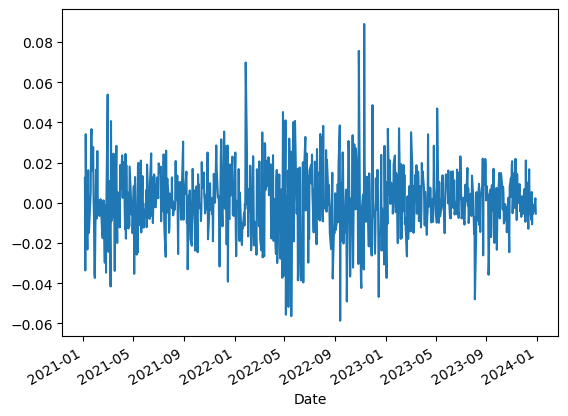

In [17]:
# plot the percentage change 
# closing prices for AAPL
daily_pc["AAPL"].plot();

# Calculating Simple Daily Accumulated Return

In [18]:
# calculate the daily accumulated return
daily_cr = (1 + daily_pc).cumprod()
daily_cr[:5]

Ticker            AA      AAPL       DAL  ...      MSFT  \
Date                                      ...             
2021-01-04       NaN       NaN       NaN  ...       NaN   
2021-01-05  1.018065  1.012364  1.021172  ...  1.000965   
2021-01-06  1.084301  0.978286  1.042603  ...  0.975010   
2021-01-07  1.085161  1.011668  1.038730  ...  1.002756   
2021-01-08  1.074839  1.020400  1.033308  ...  1.008866   

Ticker           PEP       UAL  
Date                            
2021-01-04       NaN       NaN  
2021-01-05  1.002980  1.042517  
2021-01-06  0.990712  1.045880  
2021-01-07  0.987523  1.047802  
2021-01-08  0.999376  1.039875  

[5 rows x 9 columns]

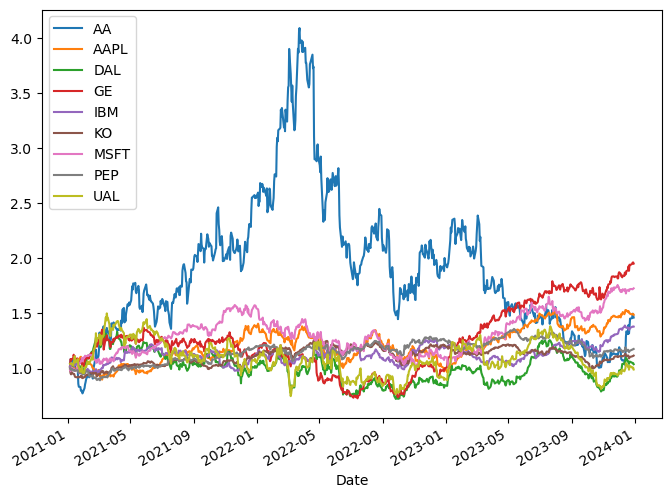

In [19]:
# build graphs of accumulated returns for all stocks,
# to get an idea of efficiency
# investments in these stocks
daily_cr.plot(figsize=(8,6))
plt.legend(loc=2);

# Changing the sampling step of a time series to calculate monthly returns instead of daily

In [20]:
# change the sampling step of the time series and 
# fill in missing values
monthly = close_px.asfreq('M').ffill()
monthly[:5]

Ticker             AA        AAPL        DAL  ...  \
Date                                          ...   
2021-01-31        NaN         NaN        NaN  ...   
2021-02-28        NaN         NaN        NaN  ...   
2021-03-31  32.490002  122.150002  48.279999  ...   
2021-04-30  36.639999  131.460007  46.919998  ...   
2021-05-31  36.639999  131.460007  46.919998  ...   

Ticker            MSFT         PEP        UAL  
Date                                           
2021-01-31         NaN         NaN        NaN  
2021-02-28         NaN         NaN        NaN  
2021-03-31  235.770004  141.449997  57.540001  
2021-04-30  252.179993  144.160004  54.400002  
2021-05-31  252.179993  144.160004  54.400002  

[5 rows x 9 columns]

In [21]:
# calculate monthly percentage changes
monthly_pc = monthly / monthly.shift(1) - 1
monthly_pc[:5]

Ticker            AA      AAPL       DAL  ...      MSFT  \
Date                                      ...             
2021-01-31       NaN       NaN       NaN  ...       NaN   
2021-02-28       NaN       NaN       NaN  ...       NaN   
2021-03-31       NaN       NaN       NaN  ...       NaN   
2021-04-30  0.127732  0.076218 -0.028169  ...  0.069602   
2021-05-31  0.000000  0.000000  0.000000  ...  0.000000   

Ticker           PEP       UAL  
Date                            
2021-01-31       NaN       NaN  
2021-02-28       NaN       NaN  
2021-03-31       NaN       NaN  
2021-04-30  0.019159 -0.054571  
2021-05-31  0.000000  0.000000  

[5 rows x 9 columns]

In [22]:
# calculate the monthly accumulated return
monthly_cr = (1 + monthly_pc).cumprod()
monthly_cr[:5]

Ticker            AA      AAPL       DAL  ...      MSFT  \
Date                                      ...             
2021-01-31       NaN       NaN       NaN  ...       NaN   
2021-02-28       NaN       NaN       NaN  ...       NaN   
2021-03-31       NaN       NaN       NaN  ...       NaN   
2021-04-30  1.127732  1.076218  0.971831  ...  1.069602   
2021-05-31  1.127732  1.076218  0.971831  ...  1.069602   

Ticker           PEP       UAL  
Date                            
2021-01-31       NaN       NaN  
2021-02-28       NaN       NaN  
2021-03-31       NaN       NaN  
2021-04-30  1.019159  0.945429  
2021-05-31  1.019159  0.945429  

[5 rows x 9 columns]

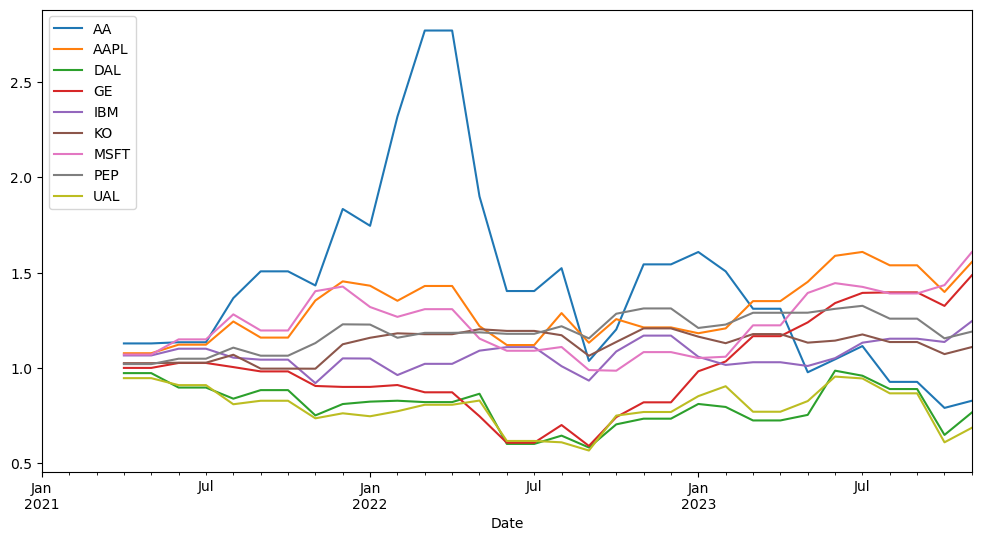

In [23]:
# build graphs of monthly accumulated 
# returns for all stocks
monthly_cr.plot(figsize=(12,6))
plt.legend(loc=2);

# Return distribution analysis

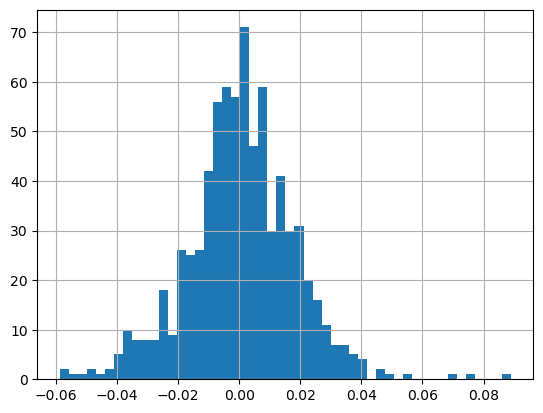

In [24]:
# histogram of daily percentage change for AAPL
aapl = daily_pc['AAPL']
aapl.hist(bins=50);

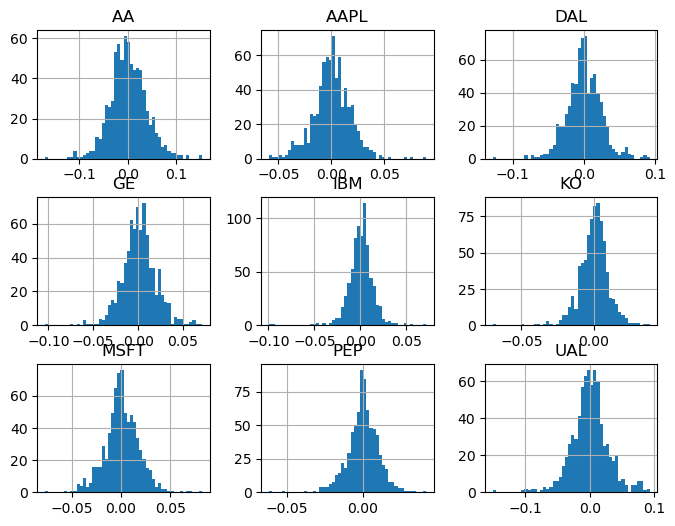

In [25]:
# histogram matrix of daily percentage changes
daily_pc.hist(bins=50, figsize=(8,6));

# Perform calculations based on a moving average

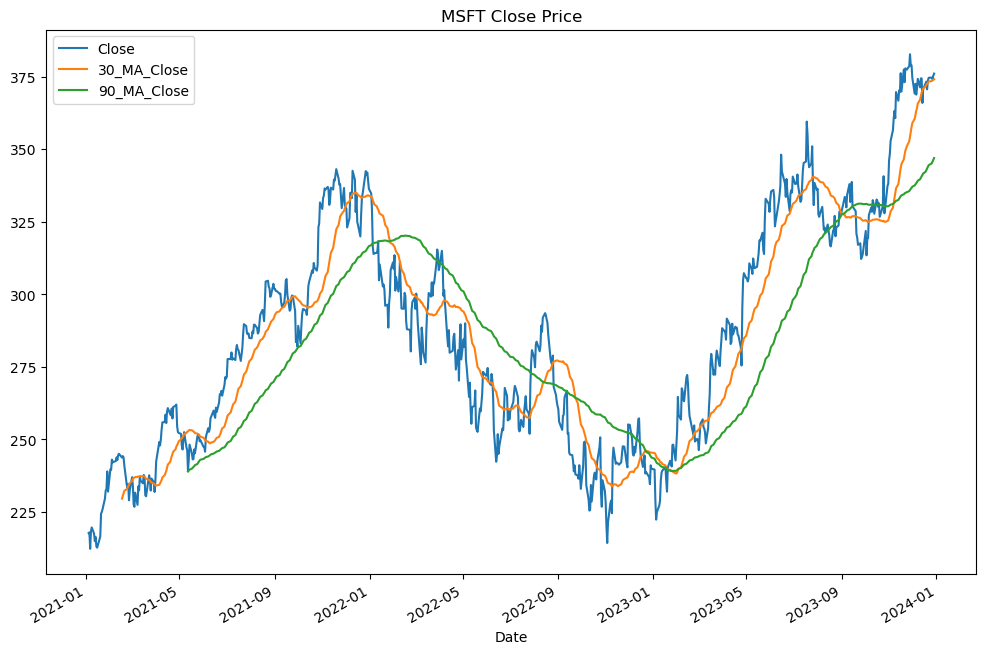

In [26]:
# extract only the MSFT closing price
msft_close = close_px[['MSFT']]['MSFT']
# calculate 30- and 90-day moving averages
ma_30 = msft_close.rolling(window=30).mean()
ma_90 = msft_close.rolling(window=90).mean()
# write to a DataFrame object whose series
# we will visualize
result = pd.DataFrame({'Close': msft_close, 
                       '30_MA_Close': ma_30,
                       '90_MA_Close': ma_90})
# visualize all series on the same chart
result.plot(title="MSFT Close Price")
plt.gcf().set_size_inches(12,8)

# Comparison of average daily stock returns

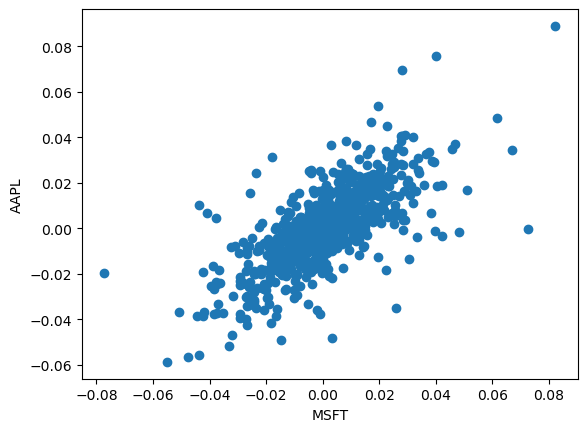

In [27]:
# visualize the relationship between daily interest 
# change in MSFT closing price and daily interest 
# change in AAPL closing price
plt.scatter(daily_pc['MSFT'], daily_pc['AAPL'])
plt.xlabel('MSFT')
plt.ylabel('AAPL');

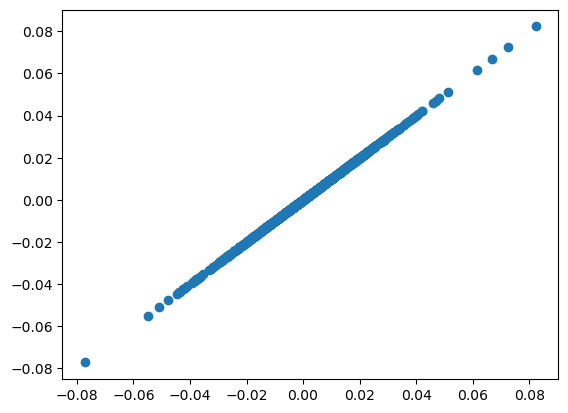

In [28]:
# demonstrate perfect correlation
plt.scatter(daily_pc['MSFT'], daily_pc['MSFT']);

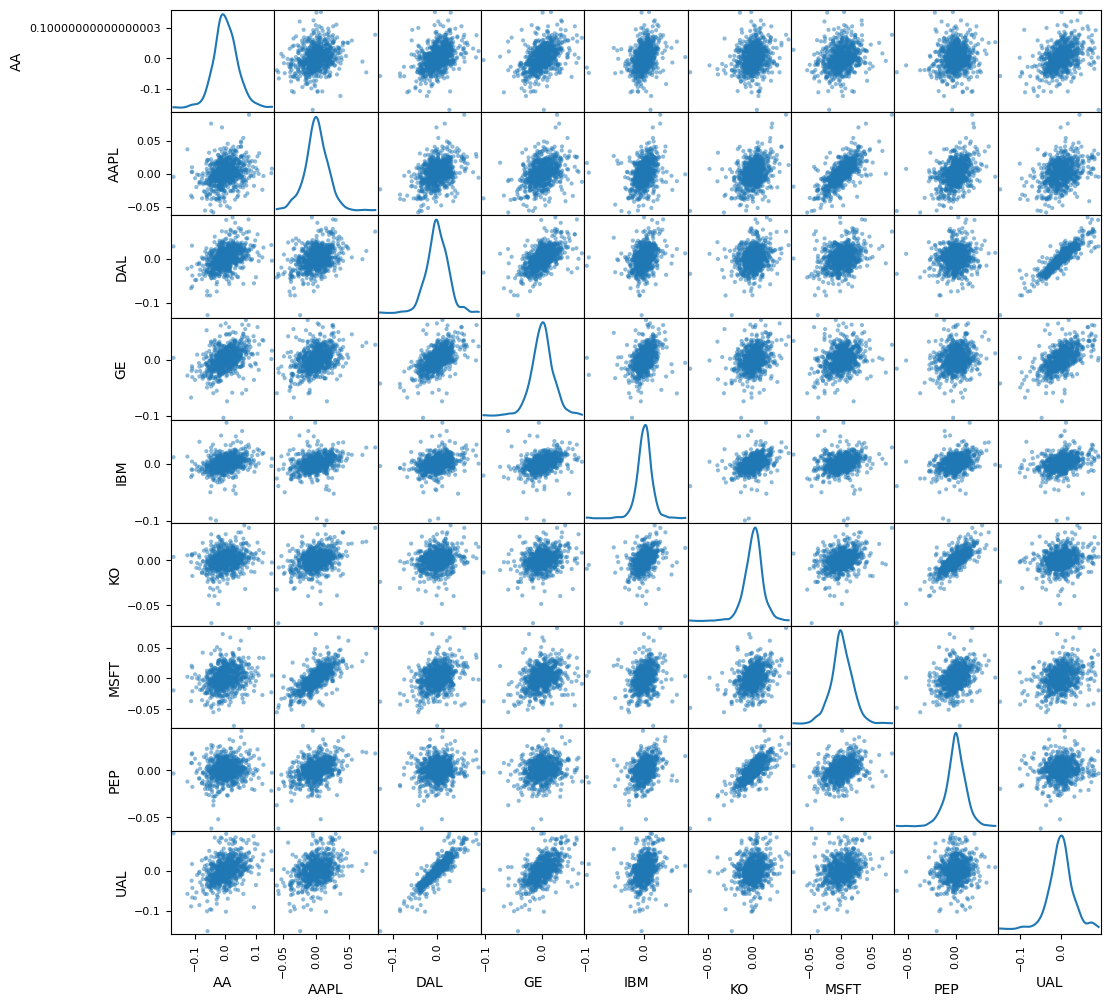

In [29]:
from pandas.plotting import scatter_matrix
# build a scatterplot matrix to 
# visualize correlations between all stocks
scatter_matrix(daily_pc, diagonal='kde', figsize=(12,12));

# Correlation between quotes based on daily percentage change in closing price

In [30]:
# calculate correlations between stock quotes based on 
# daily percentage change in closing price
corrs = daily_pc.corr()
corrs

Ticker        AA      AAPL       DAL  ...      MSFT  \
Ticker                                ...             
AA      1.000000  0.251581  0.404347  ...  0.213908   
AAPL    0.251581  1.000000  0.383364  ...  0.722078   
DAL     0.404347  0.383364  1.000000  ...  0.322379   
GE      0.415055  0.364990  0.564291  ...  0.284515   
IBM     0.301141  0.290677  0.307407  ...  0.227357   
KO      0.195841  0.372368  0.227681  ...  0.341604   
MSFT    0.213908  0.722078  0.322379  ...  1.000000   
PEP     0.110941  0.396562  0.143252  ...  0.373349   
UAL     0.380025  0.359150  0.902460  ...  0.293983   

Ticker       PEP       UAL  
Ticker                      
AA      0.110941  0.380025  
AAPL    0.396562  0.359150  
DAL     0.143252  0.902460  
GE      0.189126  0.574388  
IBM     0.346196  0.282785  
KO      0.774157  0.209921  
MSFT    0.373349  0.293983  
PEP     1.000000  0.121566  
UAL     0.121566  1.000000  

[9 rows x 9 columns]

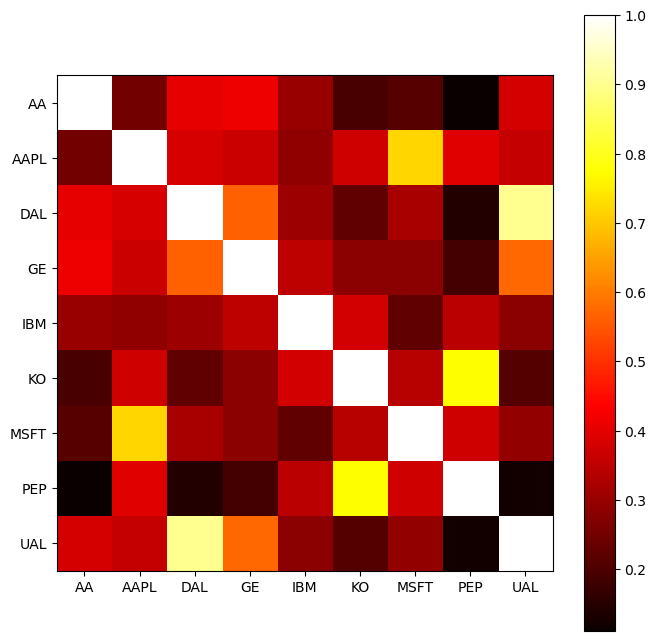

In [31]:
# build a heat map of the correlation matrix
plt.imshow(corrs, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corrs)), corrs.columns)
plt.yticks(range(len(corrs)), corrs.columns)
plt.gcf().set_size_inches(8,8)

# Volatility

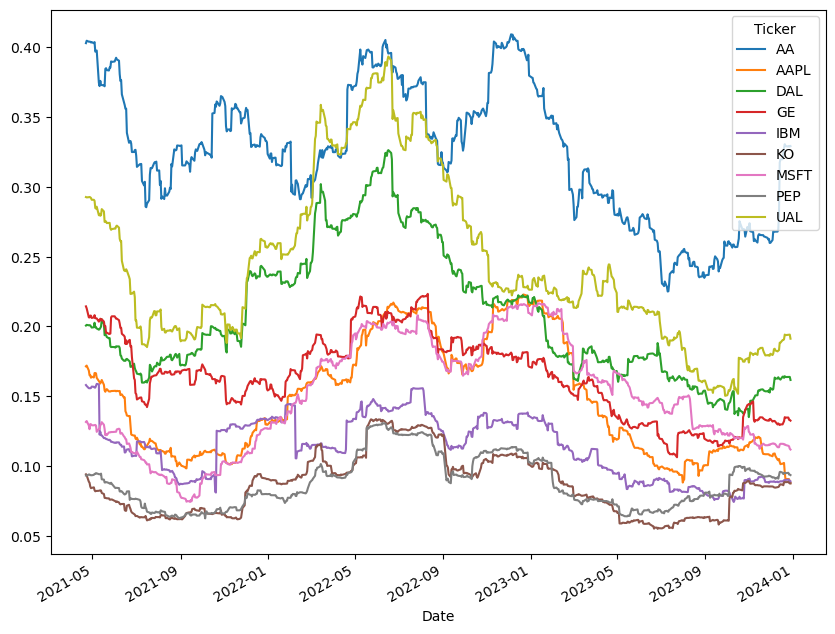

In [32]:
# minimum consisting of 75 periods
min_periods = 75
# calculate volatility
vol = daily_pc.rolling(window=min_periods).std() * \
        np.sqrt(min_periods)
# visualize it
vol.plot(figsize=(10, 8));

# Visualizing the relationship between risk and expected return

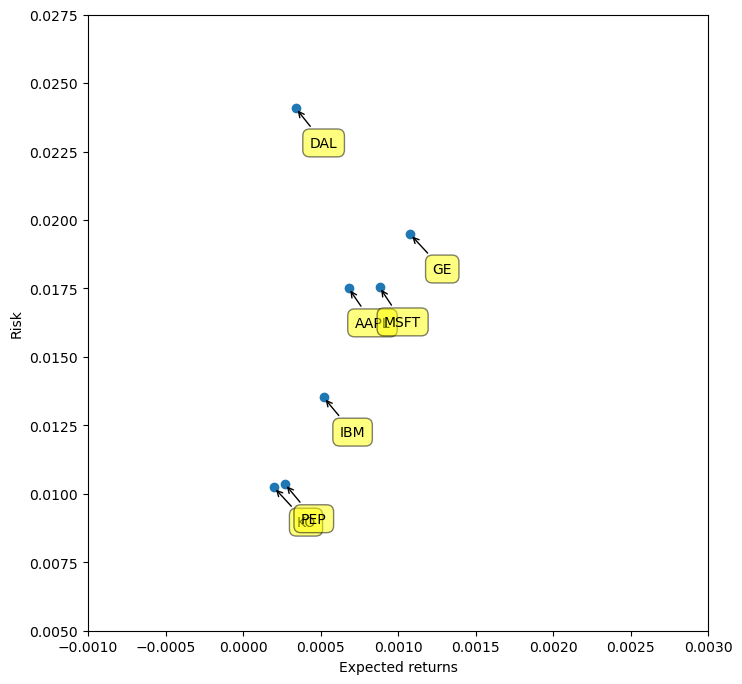

In [33]:
# build a scatterplot by comparing the average and
# standard deviation of daily percentage change
plt.scatter(daily_pc.mean(), daily_pc.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# add labels to each point
for label, x, y in zip(daily_pc.columns, 
                       daily_pc.mean(), 
                       daily_pc.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (30, -30),
        textcoords = 'offset points', ha = 'right', 
        va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', 
                    fc = 'yellow', 
                    alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', 
                          connectionstyle = 'arc3,rad=0'))

# set ranges for better representation
plt.xlim(-0.001, 0.003)
plt.ylim(0.005, 0.0275)

# set the size
plt.gcf().set_size_inches(8,8)